# Data prep and clean

In [1]:
DATA_DIR = 'MillionSongSubset/data'

In [2]:
import utils.beat_aligned_feats as beat_feat
import utils.hdf5_getters as getters

In [3]:
import os
import glob

def get_all_files(basedir,ext='.h5'):
    """
    From a root directory, go through all subdirectories
    and find all files with the given extension.
    Return all absolute paths in a list.
    """
    allfiles = []
    apply_to_all_files(basedir,func=lambda x: allfiles.append(x),ext=ext)
    return allfiles


def apply_to_all_files(basedir,func=lambda x: x,ext='.h5'):
    """
    From a root directory, go through all subdirectories
    and find all files with the given extension.
    Apply the given function func
    If no function passed, does nothing and counts file
    Return number of files
    """
    cnt = 0
    for root, dirs, files in os.walk(basedir):
        files = glob.glob(os.path.join(root,'*'+ext))
        for f in files :
            func(f)
            cnt += 1
    return cnt

allfiles = get_all_files(DATA_DIR)
print 'Found',len(allfiles),'files'

In [15]:
years = []
timbres = []
artists = []
def get_features(file):
    h5 = getters.open_h5_file_read(file)
    year = getters.get_year(h5)
    timbre = beat_feat.get_bttimbre(h5)
    artist = getters.get_artist_id(h5)
    years.append(year)
    timbres.append(timbre)
    artists.append(artist)
    h5.close()
    
apply_to_all_files(DATA_DIR, get_features)
print len(years), len(timbres), len(artists)

10000 10000 10000


In [17]:
%load_ext rpy2.ipython

lengths = [t.shape[1] for t in timbres if t is not None]

[1] 448.071


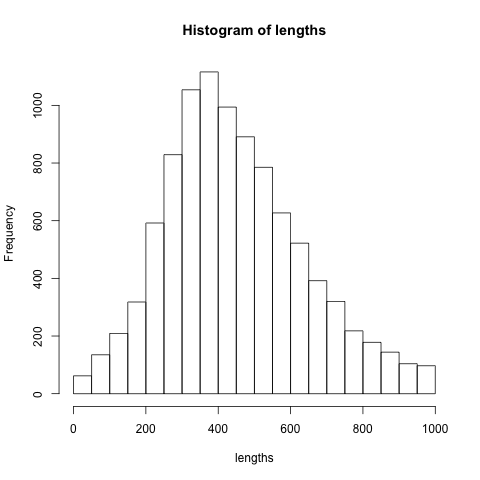

In [20]:
%%R -i lengths
lengths <- lengths[lengths<1000]
hist(lengths, nbins=50)
print(mean(lengths))

In [21]:
years

[0,
 1969,
 0,
 1982,
 2007,
 0,
 0,
 0,
 1984,
 0,
 0,
 0,
 0,
 0,
 1986,
 1987,
 0,
 0,
 2004,
 0,
 0,
 0,
 0,
 2004,
 1985,
 0,
 0,
 2005,
 1997,
 1961,
 1972,
 0,
 1964,
 1992,
 0,
 1997,
 0,
 0,
 0,
 0,
 2007,
 2003,
 0,
 0,
 1995,
 2004,
 1992,
 2002,
 2006,
 1995,
 1974,
 2009,
 1997,
 1977,
 0,
 1986,
 1966,
 1985,
 1995,
 1997,
 0,
 0,
 2000,
 2003,
 0,
 0,
 1992,
 0,
 1990,
 1985,
 2000,
 0,
 1997,
 0,
 2004,
 2000,
 0,
 0,
 1963,
 2001,
 2005,
 0,
 0,
 0,
 2002,
 1990,
 1999,
 2005,
 0,
 1990,
 0,
 0,
 0,
 0,
 2001,
 0,
 0,
 0,
 1961,
 0,
 2006,
 2000,
 1995,
 0,
 0,
 0,
 1991,
 1997,
 2005,
 1985,
 0,
 0,
 1971,
 0,
 0,
 1994,
 0,
 1971,
 0,
 1999,
 0,
 0,
 0,
 2009,
 1995,
 0,
 0,
 2007,
 0,
 1999,
 2001,
 1990,
 0,
 0,
 0,
 0,
 2009,
 1991,
 1997,
 0,
 2005,
 0,
 0,
 1988,
 0,
 0,
 1984,
 0,
 0,
 0,
 0,
 2001,
 2001,
 0,
 0,
 2010,
 1989,
 0,
 2004,
 1971,
 0,
 2006,
 0,
 2009,
 0,
 0,
 1991,
 0,
 0,
 2009,
 0,
 1986,
 1988,
 1998,
 0,
 0,
 0,
 1998,
 0,
 1994,
 0,
 0,
 0

In [26]:
WINDOW_SIZE = 200

data_years = []
data_artists = []
data_features = []

for i in range(len(timbres)):
    
    if artists[i] is None or \
        years[i] == 0 or years[i] is None or \
        timbres[i]  is None:
        continue
    
    t = 0
    while t + WINDOW_SIZE < timbres[i].shape[1]:
        data_years.append(years[i])
        data_artists.append(artists[i])
        window = timbres[i][:,t:t+WINDOW_SIZE]
        data_features.append(window)
        t += WINDOW_SIZE

print len(data_years), len(data_artists), len(data_features)
print data_features[0]

9096 9096 9096
[[  3.59151407e+01   3.99003863e+01   3.85645807e+01 ...,   3.74913648e+01
    4.16774424e+01   4.42979355e+01]
 [ -3.00702933e+01  -3.78142405e+01  -3.66584524e+01 ...,  -4.85395062e+00
   -3.09272629e+00   1.00856542e+01]
 [  3.19780646e+01   7.43732459e+00  -2.95141214e-01 ...,  -9.61707685e+00
    7.72473494e+00   2.87054824e+01]
 ..., 
 [  8.04984726e+01  -6.56563519e+00   1.56832517e+01 ...,   5.88826230e+00
    8.73419842e+00  -1.85483116e+00]
 [  4.72654900e+01   8.33315656e+00   2.08199543e+00 ...,  -1.83840664e+01
    1.10398701e+00  -1.11724036e+01]
 [ -1.28344309e+01   4.71633886e-02   5.13190580e-01 ...,   7.79142343e-01
   -7.94557679e+00   1.63186798e+01]]


In [27]:
import pickle
with open('clean_data', 'wb') as f:
    pickle.dump({'year': data_years, 'artist':data_artists, 'features':data_features}, f)

# Training 1: plain stupid regression

# Training 2: MLP

# Training 3: convnet